## Metro Nashville Historical Markers

In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Read in zip codes file.

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


The CRS doesn't seem to contain INIT, so no need to update it.

A map of the zipcode areas in Nashville.

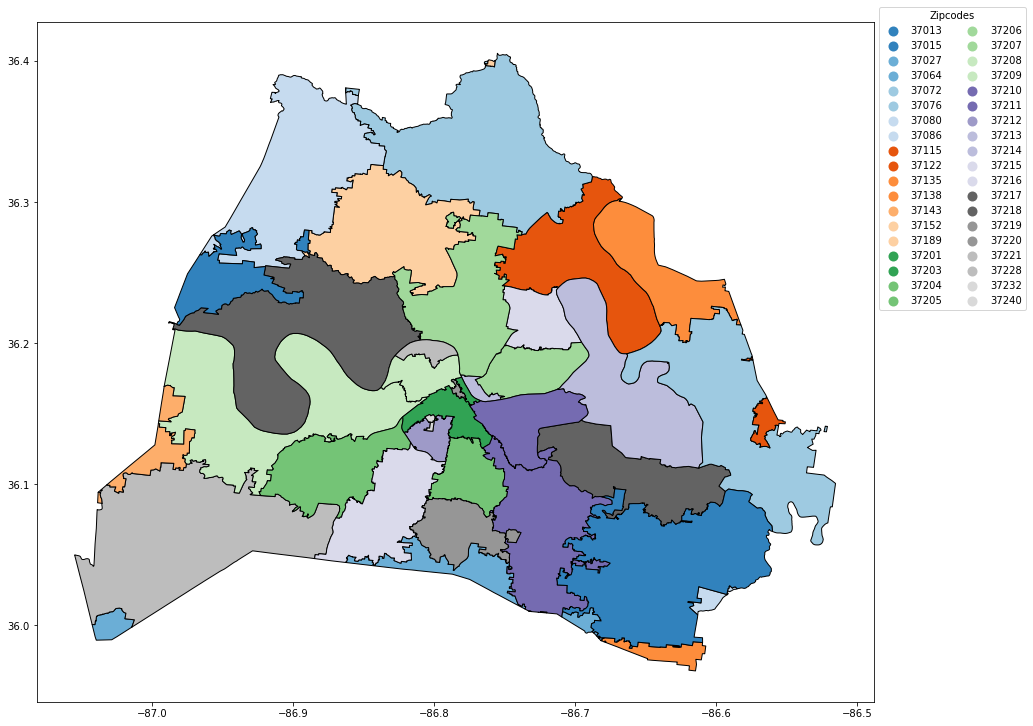

In [3]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(15, 15),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'tab20c')
plt.show()

Read in historical markers data.

Retrieved 5/12/2020 from https://data.nashville.gov/History/Historical-Markers/vk65-u7my

In [4]:
hist_markers = gpd.read_file('../data/Historical_Markers.geojson')
print(hist_markers.crs)
hist_markers.head()

epsg:4326


,number,location,latitude,marker_name,marker_text,longitude,year_erected,condition,notes,civil_war_site,geometry
0,94,Union Street and Capitol Boulevard,36.164158,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",-86.782348,1995,None,None,None,POINT (-86.78235 36.16416)
1,82,5724 Edmondson Pike,36.037807,Oglesby Community House,"Built 1898, the Mary Lee Academy, the second s...",-86.743326,1982,None,None,None,POINT (-86.74333 36.03781)
2,68,"Fourteenth Avenue South, north of Wade Avenue",36.137383,Edmondson Home Site,"Will Edmondson, born about 1883 of former slav...",-86.790549,1976,None,None,None,POINT (-86.79055 36.13738)
3,53,4949 Buena Vista Pike,36.231955,Frederick Stump 1724-1822,"Frederick Stump, an early settler in the Fort ...",-86.824931,1975,None,None,None,POINT (-86.82493 36.23195)
4,196,330 Dr. M.L.K. Jr. Blvd.,36.166414,Freedman's Savings and Trust Company Bank,"In March 1865, Congress established the Freedm...",-86.780457,2019,None,Marker Project- prioirty list double sided,None,POINT (-86.78046 36.16641)


Combining zip codes with historical markers.

In [5]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [6]:
markers_by_zip = gpd.sjoin(hist_markers, zipcodes, op = 'within')

In [7]:
markers_by_zip.head()

,number,location,latitude,marker_name,marker_text,longitude,year_erected,condition,notes,civil_war_site,geometry,index_right,zip,po_name
0,94,Union Street and Capitol Boulevard,36.164158,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",-86.782348,1995,None,None,None,POINT (-86.78235 36.16416),24,37219,NASHVILLE
70,20,116 5th Avenue North,36.161237,Ryman Auditorium,The Union Gospel Tabernacle was built in 1892 ...,-86.778856,1969,CURRENTLY DOWN,Marker Project- prioirty list replaced with up...,None,POINT (-86.77886 36.16124),24,37219,NASHVILLE
78,85,Commerce Street and Seventh Avenue North,36.160973,Vine Street Temple,Nashville's Jewish community began in the 1840...,-86.781619,1990,None,"text on one side, sketch of the building on th...",None,POINT (-86.78162 36.16097),24,37219,NASHVILLE
121,87,Eighth Avenue North and Charlotte Pike,36.164366,Nashville Sit-ins,Formerly located at this site was First Baptis...,-86.785667,1992,None,None,None,POINT (-86.78567 36.16437),24,37219,NASHVILLE
1,82,5724 Edmondson Pike,36.037807,Oglesby Community House,"Built 1898, the Mary Lee Academy, the second s...",-86.743326,1982,None,None,None,POINT (-86.74333 36.03781),49,37211,NASHVILLE


How many historical markers are in each zip code?

In [8]:
markers_by_zip.zip.value_counts()

37203    42
37212    15
37208    14
37209    12
37206    11
37201    11
37205    11
37210    10
37215     8
37221     8
37204     7
37211     7
37013     6
37217     6
37214     6
37207     5
37218     5
37220     5
37115     4
37138     4
37219     4
37076     3
37228     3
37213     2
37216     2
37072     1
37027     1
37189     1
37080     1
Name: zip, dtype: int64

How many markers are downtown (zip code 37201)?

In [9]:
markers_37201 = markers_by_zip.loc[markers_by_zip.zip == '37201']
markers_37201.shape

(11, 14)

In [10]:
polygon37201 = zipcodes.loc[zipcodes.zip == '37201']
polygon37201.shape

(1, 3)

First map of downtown historical markers

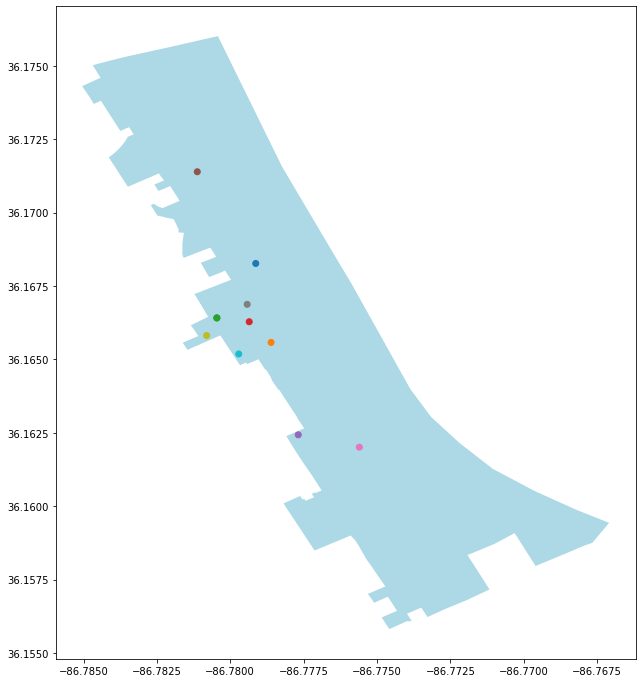

In [11]:
ax = polygon37201.plot(figsize = (12, 12), color = 'lightblue')
markers_37201.plot( ax = ax, column = 'number');
plt.show();

The downtown markers are somewhat clustered, which could make it a pleasant walk to see them all.

Changing to a streetmap so the markers can be located by actual humans.

In [12]:
print(polygon37201.geometry.centroid)

36    POINT (-86.77702 36.16557)
dtype: geometry


In [13]:
center37201 = polygon37201.geometry.centroid[36]
print(center37201)

POINT (-86.7770182911443 36.1655739503051)


In [14]:
area_37201 = [center37201.y, center37201.x]
print(area_37201)

[36.1655739503051, -86.7770182911443]


In [15]:
map_37201 = folium.Map(location =  area_37201, zoom_start = 15)

folium.GeoJson(polygon37201).add_to(map_37201)

for row_index, row_values in markers_37201.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['marker_name'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_37201)
map_37201.save('../maps/map37201.html')

map_37201

My friends who come for SSK enjoy learning about history - where are markers located in the area around Vanderbilt?

In [16]:
markers_vandy = markers_by_zip.loc[markers_by_zip.zip.isin(['37212', '37203', '37204', '37240', '37232'])]
markers_vandy.shape

(64, 14)

In [17]:
polygon_vandy = zipcodes.loc[zipcodes.zip.isin(['37212', '37203', '37204', '37240', '37232'])]
polygon_vandy.shape

(5, 3)

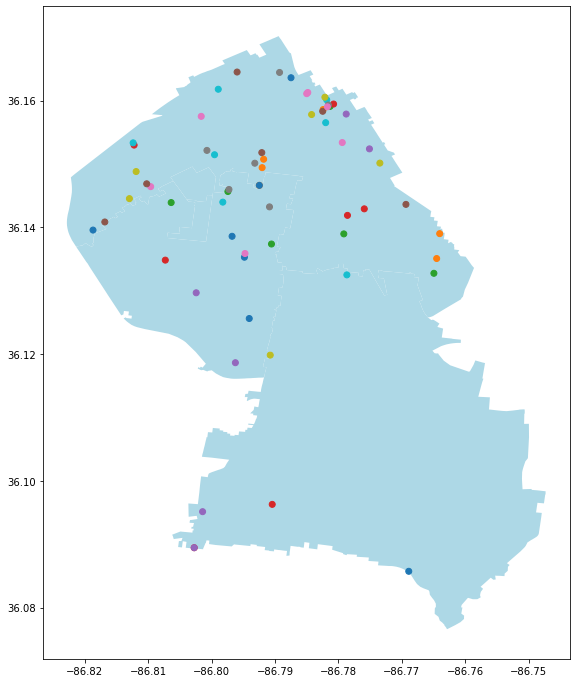

In [18]:
ax = polygon_vandy.plot(figsize = (12, 12), color = 'lightblue')
markers_vandy.plot( ax = ax, column = 'marker_name');
plt.show();

In [19]:
print(polygon_vandy.geometry.centroid)

2     POINT (-86.77467 36.10566)
9     POINT (-86.80157 36.13335)
30    POINT (-86.80236 36.14071)
35    POINT (-86.78899 36.14860)
39    POINT (-86.80250 36.14688)
dtype: geometry


In [20]:
center_vandy = polygon_vandy.geometry.centroid[35]
print(center_vandy)

POINT (-86.78898899667411 36.14860232841574)


In [21]:
area_vandy = [center_vandy.y, center_vandy.x]
print(area_vandy)

[36.14860232841574, -86.7889889966741]


In [22]:
map_vandy = folium.Map(location =  area_vandy, zoom_start = 13.5)

folium.GeoJson(polygon_vandy).add_to(map_vandy)

for row_index, row_values in markers_vandy.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['marker_name'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_vandy)
map_vandy.save('../maps/map_vandy.html')

map_vandy

# Cluster map showing location of historical markers in the area around Vanderbilt

In [23]:
cluster_map_vandy = folium.Map(location =  area_vandy, zoom_start = 13.5)

marker_cluster = MarkerCluster().add_to(cluster_map_vandy)

folium.GeoJson(polygon_vandy).add_to(cluster_map_vandy)

for row_index, row_values in markers_vandy.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['marker_name'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(marker_cluster)

cluster_map_vandy.save('../maps/cluster_vandy.html')

cluster_map_vandy  